In [0]:
# перезагрузить ноутбук
!kill -9 -1

# СТРУКТУРА ПРОЕКТА

In [1]:
#файлы и папки необходимые для проекта лежат здесь: 
!git clone https://github.com/smartsinovich/Simple-Audio-Recognition.git

Cloning into 'Simple-Audio-Recognition'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 129 (delta 14), reused 0 (delta 0), pack-reused 67
Receiving objects: 100% (129/129), 2.21 MiB | 23.12 MiB/s, done.
Resolving deltas: 100% (26/26), done.


# 1. запись с микрофона. Создание звуковых файлов

На микрофон были начитаны 30 слов на английском языке: 
bed, bird, cat, dog, down, eight, five, four, go, house, happy, left, marvin, nine, no, off, on, one, right, seven, sheila, six, stop, three, tree, two, up, wow, yes, zero.

Запись производилась при помощи программы Scratch, как самой доступной.  Также оказалось, что Scratch записывает wav файлы в близком к нужному формате - framerate = 22050, Mono. Длина одной записи - около 1 секунды.



Необработанные аудиофайлы находятся в директории MyRawAudio.
Название файла - соответстующее ему слово.
Первые символы перед названием файла означают того, кто производил запись.  Предполагается, что записи могут быть сделаны разными людьми. 


ТАК ВЫГЛЯДИТ НЕОБРАБОТАННЫЙ АУДИО ФАЙЛ:


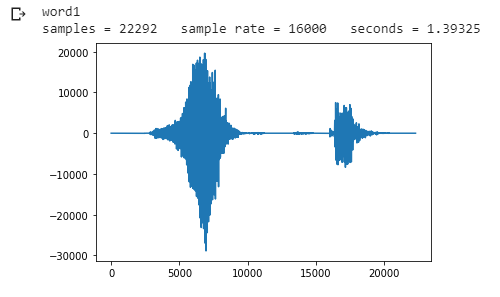

In [2]:
print("ТАК ВЫГЛЯДИТ НЕОБРАБОТАННЫЙ АУДИО ФАЙЛ:")

PATH = "/content/Simple-Audio-Recognition/Figures/"
#print(PATH + "figure3.png")
from IPython.display import Image
Image(filename = PATH + "figure2.png")

# 2. Подготовка аудио файлов.
Необработанные файлы в MyRaqAudio имеют длину около 1 сек.
Укорачиваем их до 1 секунды. Выставляем framerate=16000, соответственно меняется number of frames.


ТАК ВЫГЛЯДИТ ОРИГИНАЛЬНЫЙ АУДИОФАЙЛ:
framerate = 22050



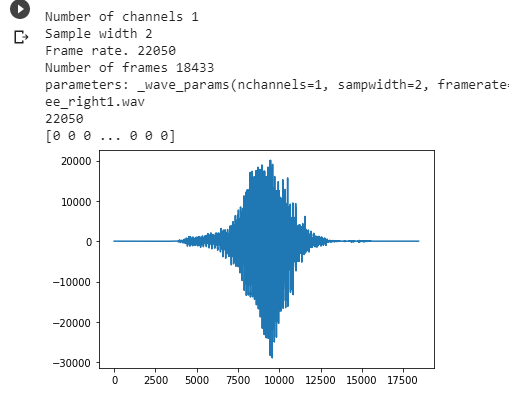

In [23]:
print("ТАК ВЫГЛЯДИТ ОРИГИНАЛЬНЫЙ АУДИОФАЙЛ:")
print('framerate = 22050')
print("")

PATH = "/content/Simple-Audio-Recognition/Figures/"
#print(PATH + "figure3.png")
from IPython.display import Image
Image(filename = PATH + "figure3.png")

ТАК ВЫГЛЯДИТ ПОДГОТОВЛЕННЫЙ АУДИОФАЙЛ: 
framerate = 16000



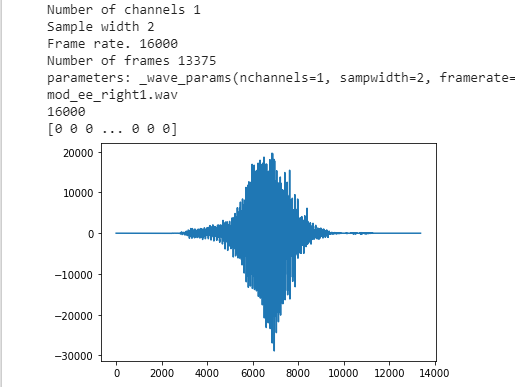

In [25]:
print("ТАК ВЫГЛЯДИТ ПОДГОТОВЛЕННЫЙ АУДИОФАЙЛ: ")
print('framerate = 16000')
print("")
PATH = "/content/Simple-Audio-Recognition/Figures/"
#print(PATH + "figure3.png")
from IPython.display import Image
Image(filename = PATH + "figure4.png")

Подготовленные файлы хранятся в директории MyRawAudio в двух отдельных папках. 
В папке My_commands хранятся десять слов - команд: 
 "yes", "no", "up", "down", "left", "right", "on", "off", "stop", "go"
В папке My_others хранятся оставшиеся 20 слов.


# 3.Генерирование аудио потока или "фразы" 

Из отдельных слов создаем фразу.
а) Берем в произвольном порядке 0, 1 или 2 слова из директория My_commands.
б) Берем в произвольном порядке 1 или 2 слова из директория My_others.
в) соединяем в произвольном порядке выбранные слова.
г) файл полученный в результате записываем в директорий Audio_streams



ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИО ПОТОК:


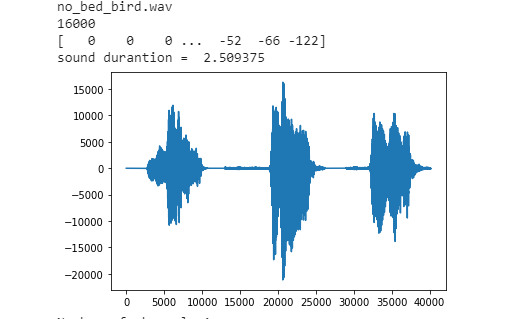

In [4]:
print("ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИО ПОТОК:")

PATH = "/content/Simple-Audio-Recognition/Figures/"
#print(PATH + "figure5.png")
from IPython.display import Image
Image(filename = PATH + "figure5.png")

Аудио потоки или фразы сохраняются в директории Audio_streams
Название файла формируется из слов, составляющих фразу. 
Например, go_zero_tree_stop.wav

# 4. Обратная задача - выделение отдельных слов из фразы.

Первоначально, для выделения отдельных слов планировалось применить иерархический алгоритм кластерного анализа (single-linkage clustering).
Результаты работы таких алгоритмов обычно представляются в виде графа, называемого дендрограммой. Для выделения кластеров её обрезают как виноградную кисть на определённом пороговом уровне. 

Была идея воспользуемся готовым решением библиотеки sciPy и также своими наработками (см.https://github.com/smartsinovich/Single-link-clustering).

Однако применить алгоритм непосредственно к нашим аудио потокам не получилось. Главным недостатком single-linkage clustering является то, что большое количесвто данных долго обрабатывается. При попытке применить его "в лоб" Colab ругался и выдавал ошибку. Поэтому было решено радикально уменьшать количетво данных аудиопотока.

В дальнейшем от иерархического алгоритма пришлось отказаться, т.к. было непонятьно как разрезать "грозди" для фраз с разным количеством слов, разной амплитудой, и разной длиной "тишины" между словами.

Был примен другой метод - определение участка тишины в аудиопотоке и его разрезание с центре "тишины".

Упрощение аудиопотока пригодилось и в этом случае. Все расчеты по определению координат точек разреза производятся на упрощенной модели аудиопотока. 


# 5. Преобразование аудио потока для уменьшения кол-ва данных

Очевидным решением является уменьшение параметра framerate для аудиофайла. 
Уменьшим количество точек в 400 раз с 16000 до 40.


ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИО ПОТОК:


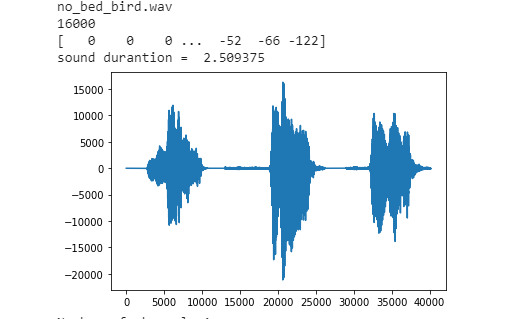

In [5]:
print("ТАК ВЫГЛЯДИТ СГЕНЕРИРОВАННЫЙ АУДИОПОТОК:")

PATH = "/content/Simple-Audio-Recognition/Figures/"
#print(PATH + "figure5.png")
from IPython.display import Image
Image(filename = PATH + "figure5.png")

ТАК ВЫГЛЯДИТ АУДИО ПОТОК ПОСЛЕ УМЕНЬШЕНИЯ КОЛ-ВА ДАННЫХ:
/content/Simple-Audio-Recognition/Figures/figure6.png


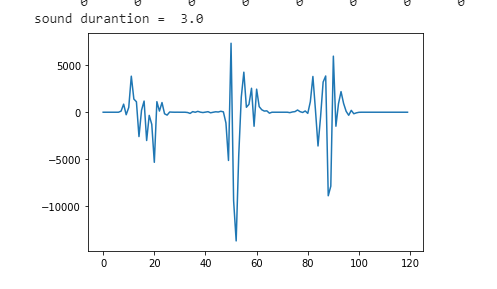

In [6]:
print("ТАК ВЫГЛЯДИТ АУДИОПОТОК ПОСЛЕ УМЕНЬШЕНИЯ КОЛ-ВА ДАННЫХ:")

PATH = "/content/Simple-Audio-Recognition/Figures/"
print(PATH + "figure6.png")
from IPython.display import Image
Image(filename = PATH + "figure6.png")

Новый файл будет называться seg_right_stop.wav и находиться в директории Seg_audio_streams.

Далее следует череда преобразований массива данных для упрощенного аудиопотока, в результате которых определяются периоды тишины между словами и координаты их центра.

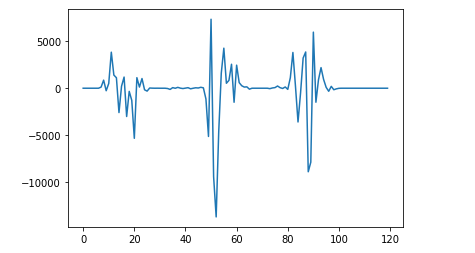

In [7]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure7.png")

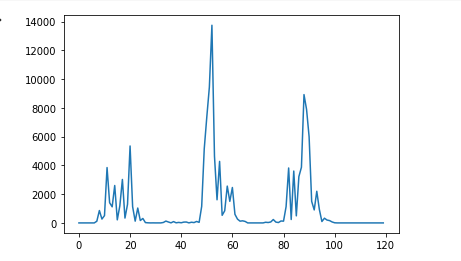

In [8]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure8.png")

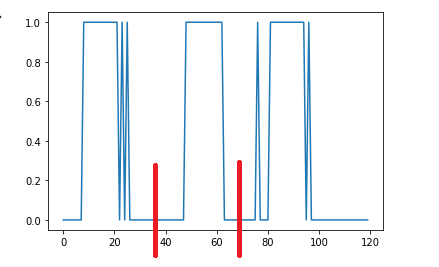

In [9]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure9.png")

Переносим координаты разрезов на упрощенный аудиопоток - получаем три отдельных слова.

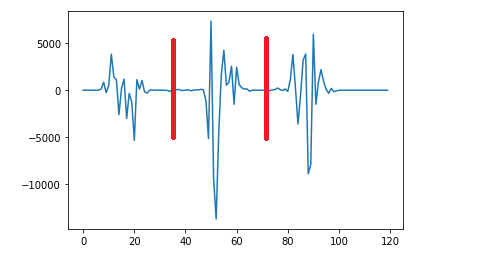

In [10]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure10.png")

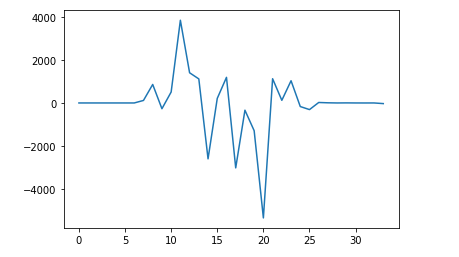

In [11]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure11.png")

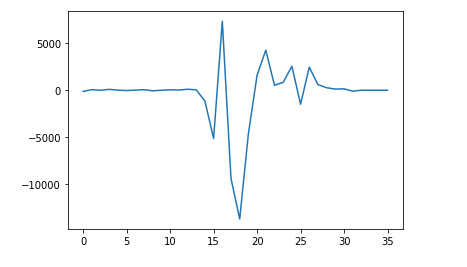

In [12]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure12.png")

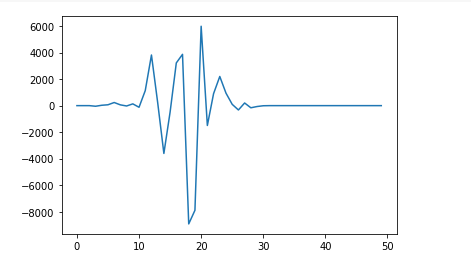

In [13]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure13.png")



---



#5. Разделение аудиопотока (фразы) на отдельные слова

Переносим точки разрыва на полноценный аудиопоток

Директорий оригинальных аудиопотоков: /content/Simple-Audio-Recognition/Audio_streams/

Применяя координаты точек разреза для оригинального аудиопотока, получаем три отдельных слова:

1_no_bed_bird.wav
2_no_bed_bird.wav
3_no_bed_bird.wav



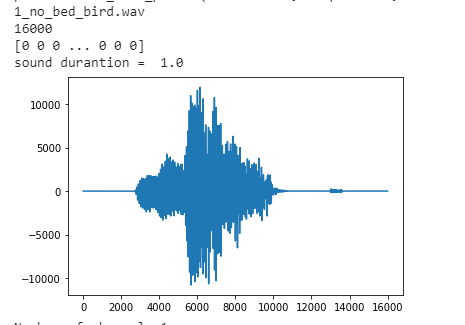

In [14]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure14.png")

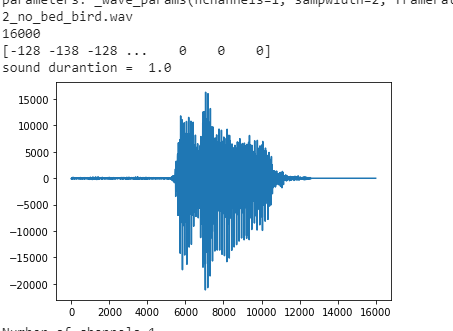

In [15]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure15.png")

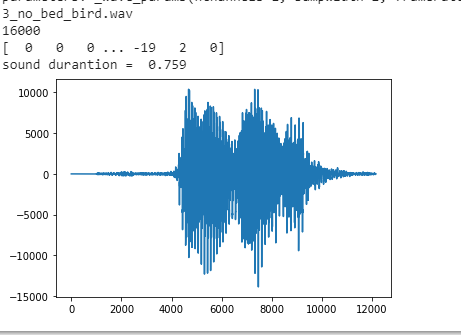

In [16]:
PATH = "/content/Simple-Audio-Recognition/Figures/"
from IPython.display import Image
Image(filename = PATH + "figure16.png")

Эти слова будут скармливаться модели.

Выделенные из потока слова находятся в директории: /Words_from_streams, в поддиректории с названием потока /no_bed_bird/

Пример пути для второго слова из фразы: 
/content/Simple-Audio-Recognition/Words_from_streams/no_bed_bird/2_no_bed_bird.wav



---



---

